In [3]:
import os
import sys
import re
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import importlib
import seaborn as sns
import umap
import phenograph

sys.path.append('..')
import catrace
import catrace.scale as catscale
import catrace.process_time_trace as ptt
import catrace.exp_collection as ecl
import catrace.cluster as caclust
import dataset_param as dtpar

In [4]:
region = 'OB'
compute_response = False
if compute_response:
    all_dfovf_select = pd.read_pickle('../../../results/JH_analysis/all_dfovf_select_{}.pkl'.format(region))

    if region =='OB':
        time_window = [5.5,11]
    else:
        time_window = [5,7]   
    frame_rate = 30/4
    all_response = ptt.mean_pattern_in_time_window(all_dfovf_select, time_window, frame_rate)
    all_response.to_pickle('../../../results/JH_analysis/all_response_select_{}.pkl'.format(region))
    all_response

In [5]:
all_response = pd.read_pickle('../../../results/JH_analysis/all_response_select_{}.pkl'.format(region))

H = catscale.standard_scale(all_response)
data = H.transpose()
fish_id = data.index.get_level_values('fish_id')
training_dict = dict(dtpar.exp_list)
train_cond= fish_id.map(training_dict)
cond_list = dtpar.cond_list
cond_order = {k: v for v, k in enumerate(cond_list)}
cond_idx = train_cond.map(cond_order)

/home/hubo/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/home/hubo/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


In [6]:
k=40
communities_raw, graph, Q = phenograph.cluster(data, k=k)
communities_raw = communities_raw + 1 # so that cluster id starts from 1

Finding 40 nearest neighbors using minkowski metric and 'auto' algorithm


/home/hubo/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/home/hubo/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


Neighbors computed in 15.833857297897339 seconds
Jaccard graph constructed in 2.7640833854675293 seconds
Wrote graph to binary file in 0.5673997402191162 seconds
Running Louvain modularity optimization
After 1 runs, maximum modularity is Q = 0.736862
After 2 runs, maximum modularity is Q = 0.737947
After 3 runs, maximum modularity is Q = 0.742305
Louvain completed 23 runs in 22.02098560333252 seconds
Sorting communities by size, please wait ...
PhenoGraph completed in 41.428865909576416 seconds


/home/hubo/.local/lib/python3.8/site-packages/seaborn/axisgrid.py:670: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


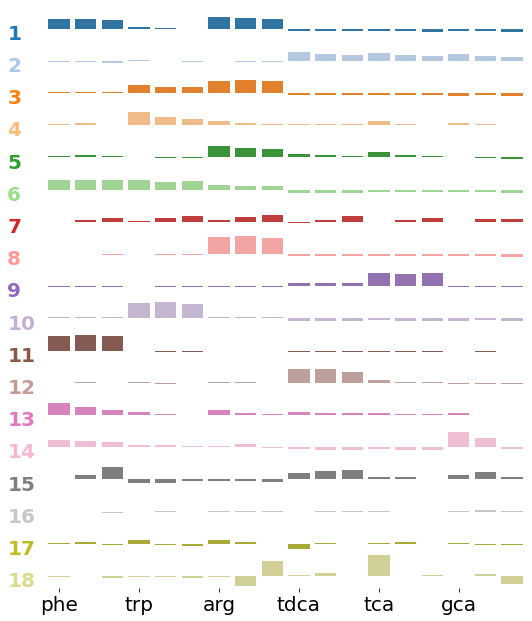

In [7]:
cluster_cmap = 'tab20'
cluster_mean_df_raw = caclust.get_cluster_mean_df(H, communities_raw)
fig = caclust.plot_cluster_tuning(cluster_mean_df_raw, cmap=cluster_cmap)
fig_dir = "/home/hubo/Projects/Ca_imaging/results/JH_analysis/figures"
fig.savefig(os.path.join(fig_dir, "cluster_mean.svg"))

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

6_arg-phe vs. 6_phe-trp: t-test independent samples, P_val:1.992e-02 t=-2.720e+00
7_arg-phe vs. 7_phe-trp: t-test independent samples, P_val:5.133e-01 t=6.755e-01
8_arg-phe vs. 8_phe-trp: t-test independent samples, P_val:4.353e-01 t=8.097e-01
9_arg-phe vs. 9_phe-trp: t-test independent samples, P_val:2.106e-01 t=-1.330e+00
10_arg-phe vs. 10_phe-trp: t-test independent samples, P_val:1.241e-01 t=-1.665e+00
11_arg-phe vs. 11_phe-trp: t-test independent samples, P_val:5.713e-01 t=-5.835e-01
12_arg-phe vs. 12_phe-trp: t-test independent samples, P_val:1.265e-01 t=1.653e+00
13_arg-phe vs. 13_phe-trp: t-test independent samples, P_val:5.850e-01 t=-5.626e-01
14_arg-phe vs. 14_phe-trp: t-test independent samples, P_val:2.926e-01 t=-1.118e+00
15_arg-phe vs. 15_phe-trp: t-test independent samples, P_val:1.788e-01 t=1

11_phe-arg vs. 11_naive: t-test independent samples, P_val:1.206e-01 t=-1.671e+00
12_phe-arg vs. 12_naive: t-test independent samples, P_val:3.920e-01 t=-8.881e-01
13_phe-arg vs. 13_naive: t-test independent samples, P_val:6.892e-01 t=4.098e-01
14_phe-arg vs. 14_naive: t-test independent samples, P_val:9.684e-01 t=4.042e-02
15_phe-arg vs. 15_naive: t-test independent samples, P_val:1.890e-01 t=-1.421e+00
16_phe-arg vs. 16_naive: t-test independent samples, P_val:6.319e-01 t=-4.916e-01
17_phe-arg vs. 17_naive: t-test independent samples, P_val:1.084e-01 t=-1.763e+00
18_phe-arg vs. 18_naive: t-test independent samples, P_val:nan t=nan
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

6_arg-phe vs. 6_phe-trp: t-test independent samples, P_val:1.992e-02 t=-2.720e+00
6_phe-arg vs. 6_phe-trp: t-test independent samples, P_val:1.888e-02 t=-2.681e+00
2_phe-arg vs. 

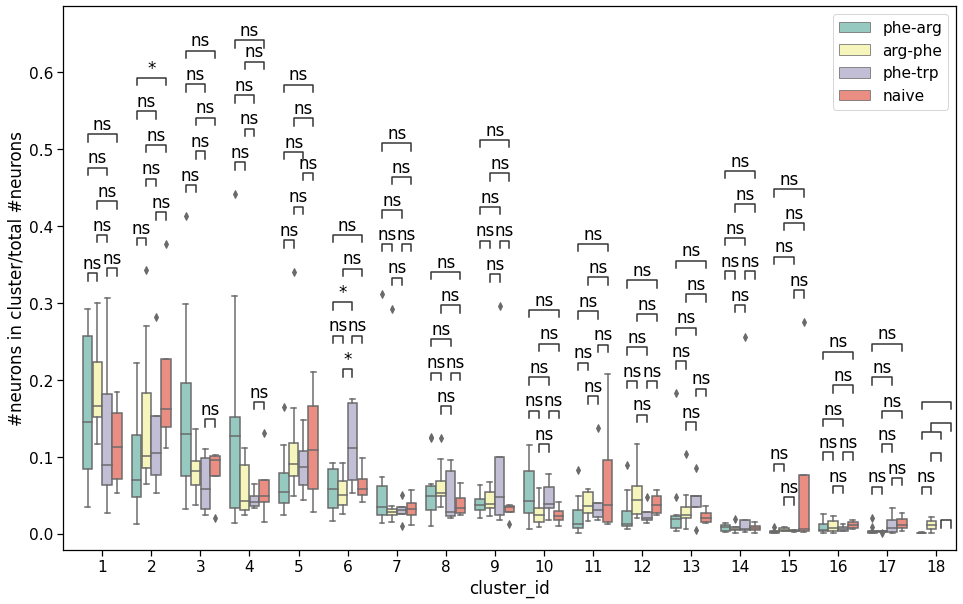

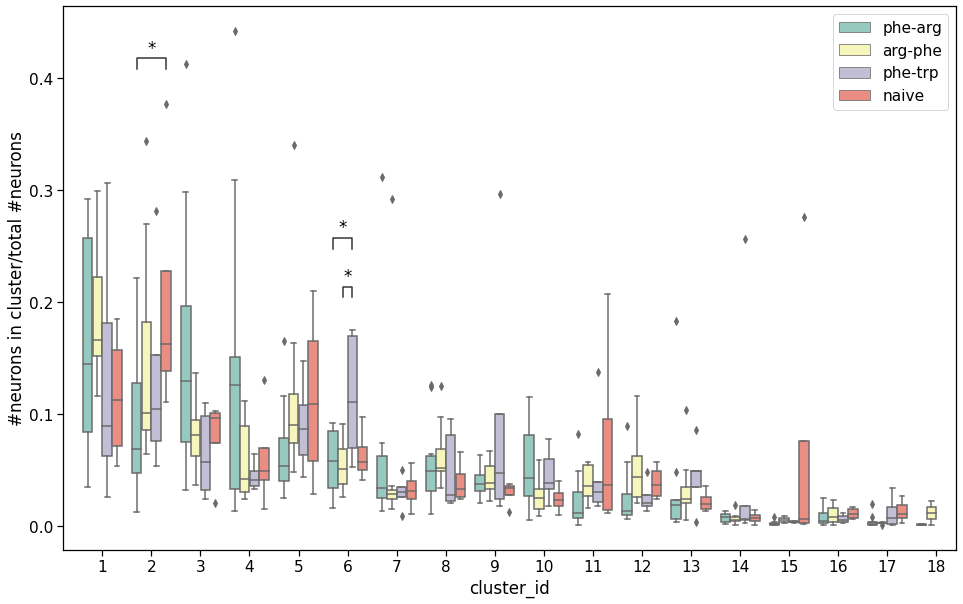

In [8]:
importlib.reload(caclust)
from itertools import combinations
labels = communities_raw


n_clusters = len(np.unique(labels))
cluster_df = pd.DataFrame(labels.reshape(1,-1), columns=all_response.columns)
cluster_df = cluster_df.transpose().rename(columns={0:'cluster_id'}).reset_index()
cluster_df['train_cond']= cluster_df['fish_id'].map(training_dict)
cluster_count_df = cluster_df.groupby('train_cond', sort=False).cluster_id.value_counts(normalize=True).sort_index().reindex(dtpar.cond_list, level='train_cond')
cluster_count_df

cond_pair = list(combinations(dtpar.cond_list, 2))
all_pairs = []

for cluster_id in range(1, n_clusters+1):
    all_pairs.extend([[(cluster_id, x[0]), (cluster_id, x[1])] for x in cond_pair])
    
cluster_df = pd.DataFrame(labels.reshape(1,-1), columns=all_response.columns)
cluster_df = cluster_df.transpose().rename(columns={0:'cluster_id'}).reset_index()
cluster_df['train_cond']= cluster_df['fish_id'].map(training_dict)
cond_list = ['phe-arg', 'arg-phe', 'phe-trp', 'naive']

grouped_cluster_id = cluster_df.groupby(['fish_id','train_cond'], sort=False).cluster_id
cluster_count_df = grouped_cluster_id.value_counts(normalize=True).sort_index().reindex(cond_list, level='train_cond')

cluster_count_df = cluster_count_df.rename('ratio').reset_index()
cluster_count_df

annotator, fig1 = caclust.plot_cluster_cont_with_stat(cluster_count_df, all_pairs, cond_list)

new_pairs = caclust.get_significant_pairs(annotator)
new_pairs

annotator2, fig2 = caclust.plot_cluster_cont_with_stat(cluster_count_df, new_pairs, cond_list)
fig2.savefig(os.path.join(fig_dir, "cluster_cont.svg"))

In [9]:
cluster_df.to_pickle('../../../results/JH_analysis/cluster_df_{}.pkl'.format(region))

In [10]:
cluster_df = pd.read_pickle('../../../results/JH_analysis/cluster_df_{}.pkl'.format(region))

In [34]:
from skimage.io import imsave
import catrace.nrn_coord as caroi
importlib.reload(caroi)
%matplotlib inline
data_root_dir = '/media/hubo/WD_BoHu/BCE/Ca_imaging/results/'
cluster_stack_dir = '/home/hubo/Projects/Ca_imaging/results/JH_analysis/cluster_stack'
save_fig = True
for exp_name, cond in dtpar.exp_list:
    print(exp_name)
    exp_dir = os.path.join(data_root_dir, exp_name, region)
    stack_name = f'{region}_{exp_name}'
    meta_df = cluster_df.loc[cluster_df['fish_id'] == expname]
    mstack = caroi.map_meta_to_roi_stack(exp_dir, meta_df, 'cluster_id')
    # np.save(mstack, os.path.join(cluster_stack_dir, 'stacks', '{region}_{expname}.npz'))
    imsave(os.path.join(cluster_stack_dir, 'stacks', f'{stack_name}.tif'), mstack)
    fig = caroi.plot_meta_stack(mstack, cluster_cmap, title=stack_name)
    if save_fig:
        fig.savefig(os.path.join(cluster_stack_dir, 'figures', f'{stack_name}.svg'))
    plt.close()

2021-02-05-DpOBEM-JH9
2021-03-18-DpOBEM-JH10
2021-03-19-DpOBEM-JH10
2021-04-02-DpOBEM-JH11
2021-04-03-DpOBEM-JH11
2021-05-01-DpOBEM-JH13
2021-05-22-DpOBEM-JH14
2021-07-15-DpOBEM-N2
2021-07-16-DpOBEM-N3
2021-07-30-DpOBEM-JH17
2021-07-31-DpOBEM-JH17
2021-09-02-DpOBEM-JH18
2021-09-03-DpOBEM-JH18
2021-09-04-DpOBEM-JH18
2021-09-15-DpOBEM-JH20
2021-09-17-DpOBEM-JH20
2021-09-18-DpOBEM-JH20
2021-09-29-DpOBEM-JH21
2021-10-01-DpOBEM-JH21
2021-10-02-DpOBEM-JH21
2021-11-10-DpOBEM-JH23
2021-11-14-DpOBEM-JH23
2021-11-24-DpOBEM-JH24
2021-11-27-DpOBEM-JH24
2021-11-26-DpOBEM-JH24
2021-12-10-DpOBEM-N4
2021-12-31-DpOBEM-N7
2022-01-23-DpOBEM-N8
2022-01-30-DpOBEM-N9
2022-02-13-DpOBEM-N10
2022-02-20-DpOBEM-N11


In [37]:
%matplotlib qt5
exp_name = '2021-07-31-DpOBEM-JH17'
stack_name = f'{region}_{exp_name}'
mstack = imread(os.path.join(cluster_stack_dir, 'stacks', f'{stack_name}.tif'))
fig = caroi.plot_meta_stack(mstack, cluster_cmap, title=stack_name)